In [ ]:
##################################
# Analysis -  Mouse Gastrulation #
##################################
# stage_endo_blood={'E7.0', 'E7.25', 'E7.5', 'E8.25', 'E7.75', 'E8.5', 'E8.0'}
# celltype_endo_blood={'Erythroid2', 'Blood progenitors 2', 'Erythroid3', 'Erythroid1', 'Blood progenitors 1',
#                    'Haematoendothelial progenitors','Blood progenitors 1'}
# Using all 2000 genes to plot cell velocity

In [1]:
from velocity_plot import velocity_plot as vpl
from turtle import color
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from sampling import *
import pandas as pd
from colormap import *
import random
import os

In [2]:
not_combined_detail=False

if not_combined_detail:
    # load raw
    raw_data_path = "/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/mouse_endo_blood20to25_2000_genes_moment100.csv"
    load_raw_data = pd.read_csv(raw_data_path)

    # combine detail
    detail_result_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth'
    path_name_after_no='_all_geneepoch200check_n10Lr0.001C2cf0.3Downneighbors0_200_200Ratio0.125N30OAdamtraceR0.0corrcoefR0.0nD30autoDTrueautoNTruecostTsmoothavgCWin10p3smoW0.1binTrue/detail_e200.csv'
    load_cellDancer=pd.DataFrame()
    for i in range(1,11):
        detail_path=os.path.join(detail_result_path,(str(i)+path_name_after_no))
        detail=pd.read_csv(detail_path)

        detail.rename(columns = {'Unnamed: 0':'cellIndex'}, inplace = True) # for the optimize of data_reshape
        detail = detail.sort_values(by = ['gene_name', 'cellIndex'], ascending = [True, True]) # for the optimize of data_reshape

        load_cellDancer=load_cellDancer.append(detail)
    load_cellDancer=load_cellDancer.reset_index(drop=True)
    load_cellDancer_bkup=load_cellDancer.copy()
    
    
    load_cellDancer['clusters']=load_raw_data['clusters']
    load_cellDancer['cellID']=load_raw_data['cellID']
    load_cellDancer['embedding1']=load_raw_data['embedding1']
    load_cellDancer['embedding2']=load_raw_data['embedding2']
    load_cellDancer
    load_cellDancer.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/combined_detail/combined_detail.csv',index=False)

else:
    load_cellDancer=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/combined_detail/combined_detail.csv')
# define output path
#output_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/cell_velocity'

In [9]:
load_cellDancer

cellIndex      gene_name        s0        u0        s1        u1  \
0                 0  2810025M15Rik  1.515440  0.000000  1.514860  0.000022   
1                 1  2810025M15Rik  1.574459  0.000000  1.573860  0.000022   
2                 2  2810025M15Rik  1.744201  0.000000  1.743548  0.000020   
3                 3  2810025M15Rik  1.332406  0.000000  1.331888  0.000024   
4                 4  2810025M15Rik  1.261786  0.000000  1.261292  0.000025   
...             ...            ...       ...       ...       ...       ...   
24657995      12324          Zrsr2  0.255452  0.030816  0.323642  0.022484   
24657996      12325          Zrsr2  0.204272  0.049630  0.322781  0.036203   
24657997      12326          Zrsr2  0.230350  0.050146  0.349145  0.036532   
24657998      12327          Zrsr2  0.236227  0.052799  0.361591  0.038445   
24657999      12328          Zrsr2  0.234467  0.057909  0.372997  0.042155   

             alpha      beta     gamma      cost             clusters  \
0         0.001560  0.022612  0.005908  0.087183  Blood progenitors 2   
1         0.001522  0.022650  0.005876  0.087183  Blood progenitors 2   
2         0.001426  0.022751  0.005787  0.087183  Blood progenitors 2   
3         0.001682  0.022495  0.006009  0.087183  Blood progenitors 2   
4         0.001732  0.022449  0.006049  0.087183  Blood progenitors 2   
...            ...       ...       ...       ...                  ...   
24657995  0.005919  0.101278  0.144163  0.126370           Erythroid3   
24657996  0.008434  0.100651  0.142879  0.126370           Erythroid3   
24657997  0.008174  0.100769  0.143180  0.126370           Erythroid3   
24657998  0.008380  0.100769  0.143180  0.126370           Erythroid3   
24657999  0.008959  0.100709  0.143022  0.126370           Erythroid3   

               cellID  embedding1  embedding2  
0            cell_363    3.460521   15.574629  
1            cell_382    2.490433   14.971734  
2            cell_385    2.351203   15.267069  
3            cell_393    5.899098   14.388825  
4            cell_398    4.823139   15.374831  
...               ...         ...         ...  
24657995  cell_139318    8.032358    7.603037  
24657996  cell_139321   10.352904    6.446736  
24657997  cell_139326    9.464873    7.261099  
24657998  cell_139327    9.990495    7.243880  
24657999  cell_139330    8.260699    7.935455  

[24658000 rows x 14 columns]

In [80]:
cell_time=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/pseudotime/cell_time_Gastrulation_pz0330.csv')

cell_time_time_sort=cell_time.sort_values('time')

cell_time_time_sort

In [84]:
merged

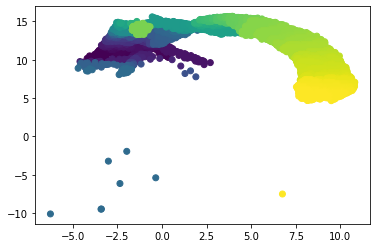

In [83]:
plt.scatter(merged.embedding1,merged.embedding2,c=merged.time)

In [85]:
merged

index  time  cellIndex gene_name        s0        u0        s1  \
0       3592   0.0       3592   Smarca2  0.662104  0.174482  0.639948   
1      12314   0.0      12314   Smarca2  0.570327  0.180019  0.569723   
2       6927   0.0       6927   Smarca2  0.459883  0.053328  0.408794   
3       9880   0.0       9880   Smarca2  0.398971  0.058427  0.362851   
4       9427   0.0       9427   Smarca2  0.395262  0.054747  0.357592   
...      ...   ...        ...       ...       ...       ...       ...   
12324  11513   1.0      11513   Smarca2  0.004237  0.005014  0.006794   
12325   7456   1.0       7456   Smarca2  0.000000  0.000000  0.000000   
12326   7452   1.0       7452   Smarca2  0.004075  0.000000  0.003366   
12327   3968   1.0       3968   Smarca2  0.014125  0.000000  0.011661   
12328  11413   1.0      11413   Smarca2  0.010059  0.000000  0.008305   

             u1     alpha      beta     gamma      cost  \
0      0.134392  0.015292  0.157295  0.286465  0.046685   
1      0.139168  0.019294  0.157494  0.283545  0.046685   
2      0.039985  0.005169  0.171444  0.283359  0.046685   
3      0.043958  0.006380  0.171060  0.281105  0.046685   
4      0.041169  0.006105  0.171537  0.281104  0.046685   
...         ...       ...       ...       ...       ...   
12324  0.004907  0.007919  0.177946  0.267228  0.046685   
12325  0.001202  0.007457  0.178544  0.267268  0.046685   
12326  0.001190  0.007382  0.178548  0.267451  0.046685   
12327  0.001161  0.007198  0.178559  0.267901  0.046685   
12328  0.001172  0.007272  0.178555  0.267720  0.046685   

                             clusters       cellID  embedding1  embedding2  
0      Haematoendothelial progenitors   cell_36183   -3.637248   10.940038  
1      Haematoendothelial progenitors  cell_139266   -3.414126   11.173108  
2      Haematoendothelial progenitors   cell_91562   -1.346472   12.334801  
3      Haematoendothelial progenitors  cell_126097   -1.594642   12.237121  
4      Haematoendothelial progenitors  cell_122321   -1.674370   12.362613  
...                               ...          ...         ...         ...  
12324                      Erythroid3  cell_135548    8.023061    5.393051  
12325                      Erythroid3   cell_96487    7.862419    6.003148  
12326                      Erythroid3   cell_96459    7.923254    5.762695  
12327                      Erythroid3   cell_38417    8.415958    5.695527  
12328                      Erythroid3  cell_135017    8.265903    4.995063  

[12329 rows x 16 columns]

In [222]:
def gene_pseudotime(gene,load_cellDancer,colors=None,save_path=None):
    
    # TODO: Find a suitabe to get cell_time_time_sort variable,(about 10 minutes), in this script, cell_time_time_sort was obtained from global variable
    
    plt.figure()
    onegene=load_cellDancer[load_cellDancer.gene_name==gene]
    merged=pd.merge(cell_time_time_sort,onegene,left_on='index', right_on='cellIndex') # TODO: NOT cellIndex in the future
    plt.title(gene)
    
    cluster_info=onegene.clusters
    
    # build color map
    if colors is None:
        color_list=grove2.copy()
        cluster_list=onegene.clusters.drop_duplicates()
        from itertools import cycle
        colors = dict(zip(cluster_list, cycle(color_list)) if len(cluster_list) > len(color_list) else zip(cycle(cluster_list), color_list))
    
    # plot legend
    from matplotlib.patches import Patch
    from matplotlib.lines import Line2D
    def gen_Line2D(label, markerfacecolor):
        return Line2D([0], [0], color='w', marker='o', label=label, markerfacecolor=markerfacecolor,  markeredgewidth=0, markersize=5)
    legend_elements = []
    for i in colors:
        legend_elements.append(gen_Line2D(i, colors[i]))
    lgd=plt.legend(handles=legend_elements, bbox_to_anchor=(1.01, 1), loc='upper left')
    
    custom_map=merged.clusters.map(colors)
    plt.scatter(merged.time,merged.s0,c=custom_map,s=3)
    
    if save_path is not None:
        plt.savefig(save_path+gene+'.pdf',bbox_inches='tight',bbox_extra_artists=(lgd,),)
    plt.show()
    return(ax)

def gene_list_pseudotime(gene_list,load_cellDancer,colors=None,save_path=None):
    for gene in gene_list:
        gene_pseudotime(gene,load_cellDancer,colors=colors,save_path=save_path)

# todo: add cluster color
# todo: plt.show() for all plot functions
# todo: build map itself
# from colormap import *
# color_list=solarExtra02.copy()

# colors = {
# 'Haematoendothelial progenitors':color_list[0],
# 'Blood progenitors 1':color_list[1],
# 'Blood progenitors 2':color_list[2],
# 'Erythroid1':color_list[3],
# 'Erythroid2':color_list[4],
# 'Erythroid3':color_list[5]}


# #colors=None


# gene_list=['Hba-x','Smim1','Snca','Blvrb','Phc2','Skap1','Nfkb1','Myo1b','Sulf2','Yipf5','Coro2b','Mllt3','Smarca2']
# #gene_list=['Hba-x']

# save_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes/pseudotime/'
# #save_path=None

# cell_time=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/pseudotime/cell_time_Gastrulation_pz0330.csv')
# cell_time_time_sort=cell_time.sort_values('time')
# cell_time_time_sort

# gene_list_pseudotime(gene_list,load_cellDancer,colors,save_path=save_path)

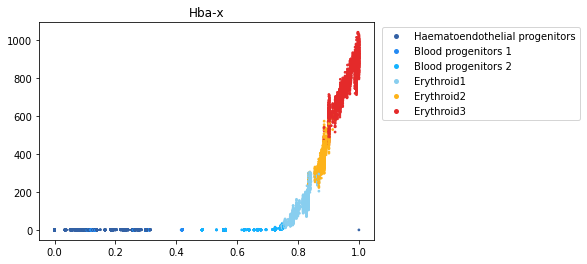

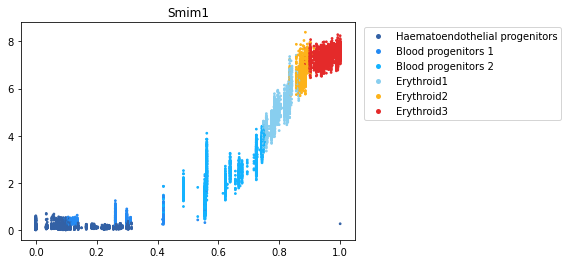

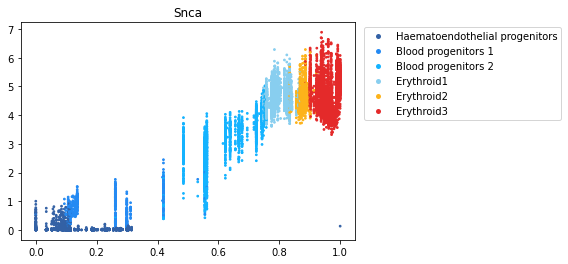

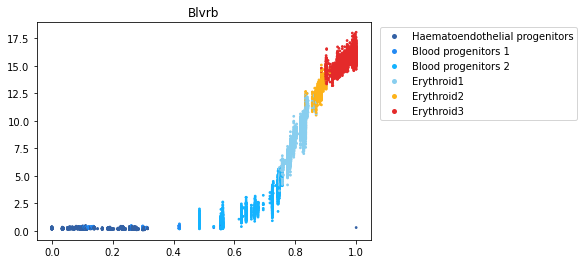

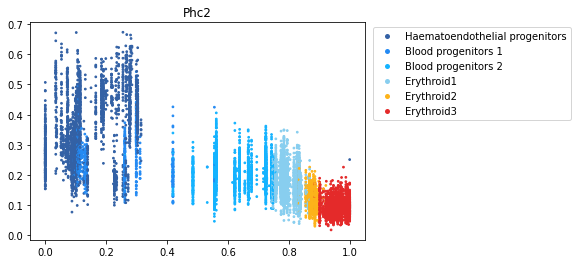

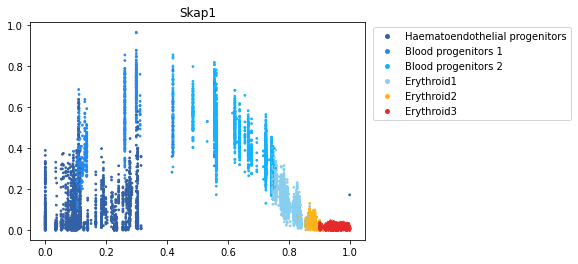

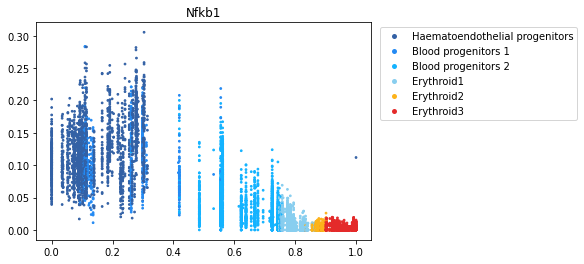

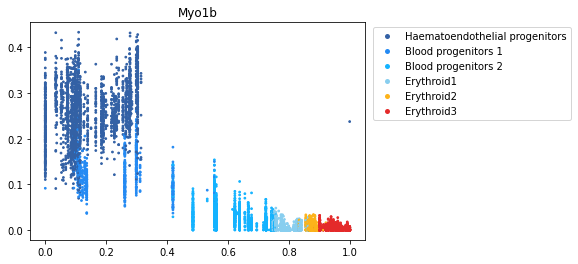

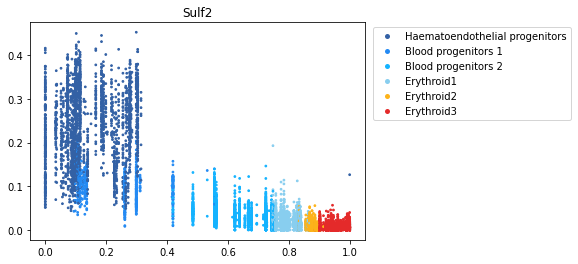

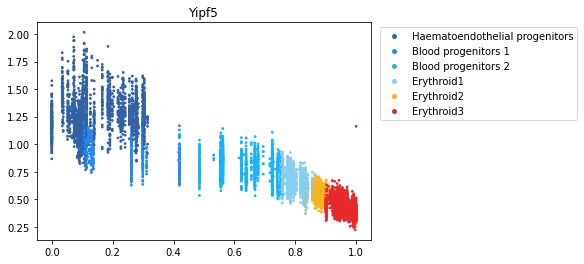

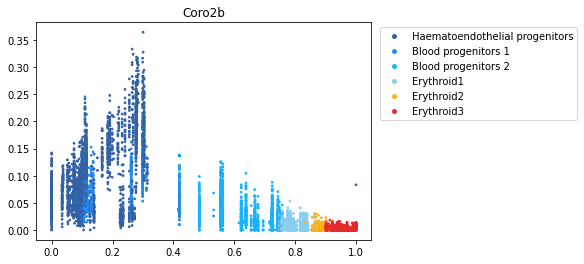

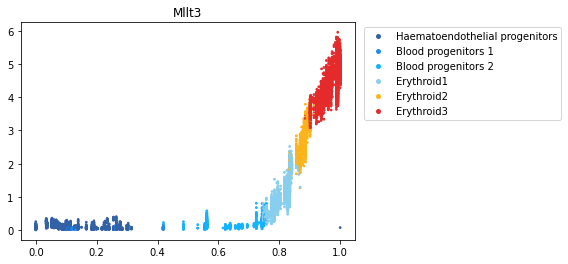

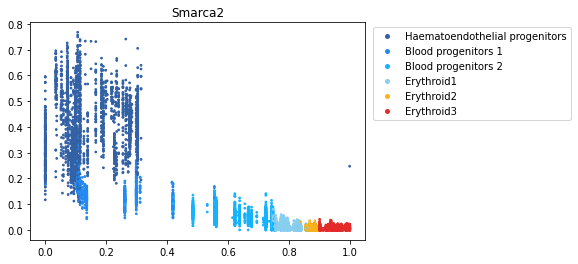

In [229]:
# NOT SMOOTHED YET

from colormap import *
color_list=solarExtra02.copy()

colors = {
'Haematoendothelial progenitors':color_list[0],
'Blood progenitors 1':color_list[1],
'Blood progenitors 2':color_list[2],
'Erythroid1':color_list[3],
'Erythroid2':color_list[4],
'Erythroid3':color_list[5]}


#colors=None


gene_list=['Hba-x','Smim1','Snca','Blvrb','Phc2','Skap1','Nfkb1','Myo1b','Sulf2','Yipf5','Coro2b','Mllt3','Smarca2']
#gene_list=['Hba-x']

save_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/pseudotime_gene_no_smooth/'
#save_path=None

cell_time=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/pseudotime_gene_no_smooth/pseudo_time_Gastrulation_combined.csv')
cell_time_time_sort=cell_time.sort_values('pseudotime')
cell_time_time_sort.columns=['index','time']

gene_list_pseudotime(gene_list,load_cellDancer,colors,save_path=save_path)

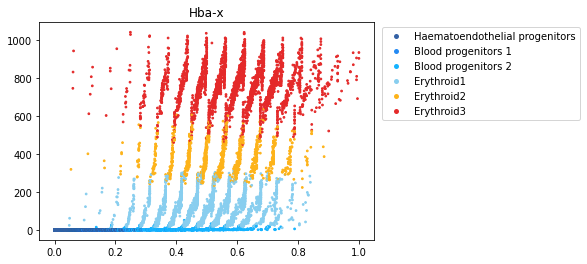

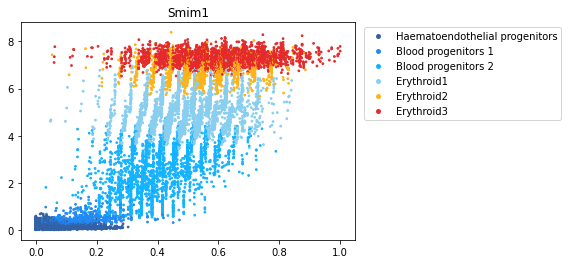

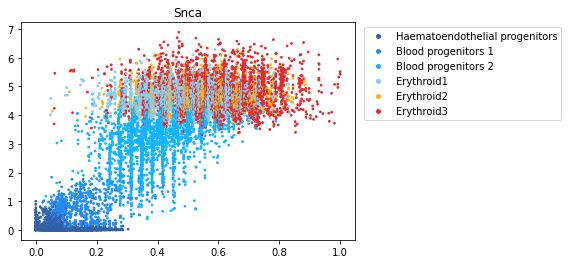

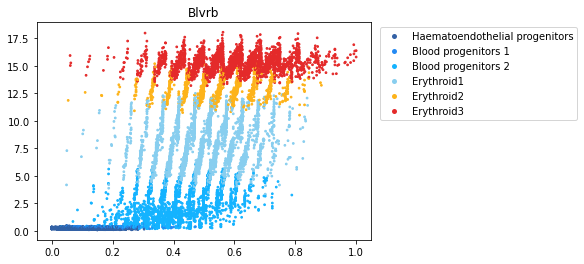

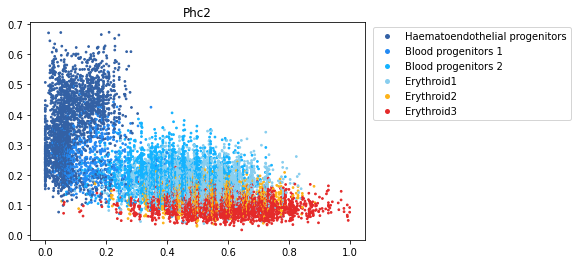

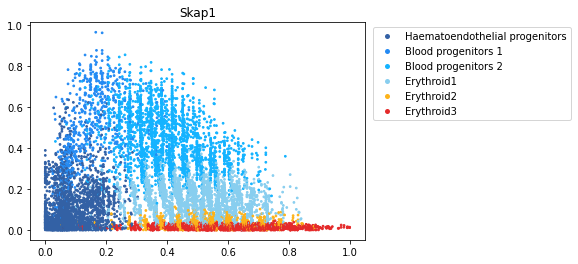

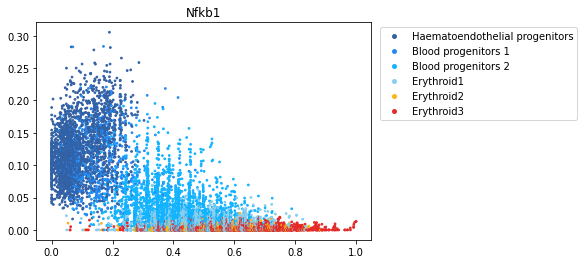

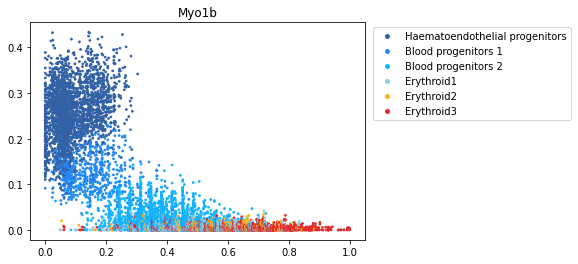

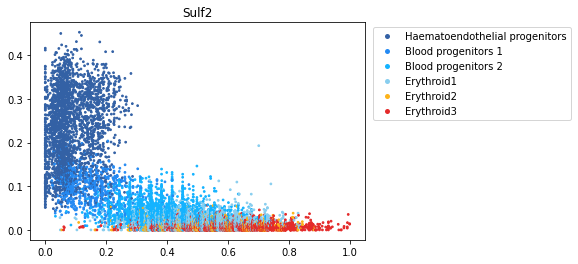

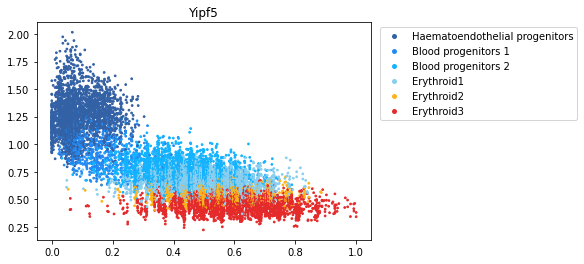

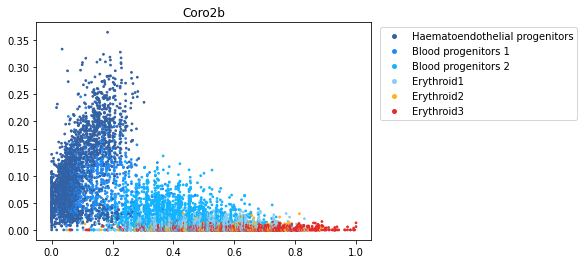

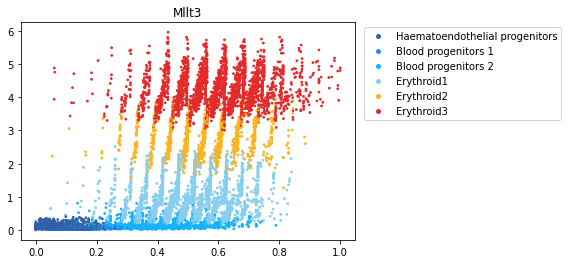

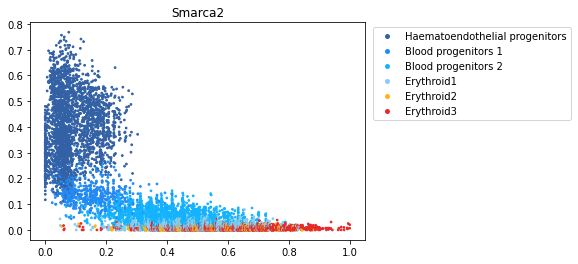

In [230]:
# SMOOTHED

from colormap import *
color_list=solarExtra02.copy()

colors = {
'Haematoendothelial progenitors':color_list[0],
'Blood progenitors 1':color_list[1],
'Blood progenitors 2':color_list[2],
'Erythroid1':color_list[3],
'Erythroid2':color_list[4],
'Erythroid3':color_list[5]}


#colors=None


gene_list=['Hba-x','Smim1','Snca','Blvrb','Phc2','Skap1','Nfkb1','Myo1b','Sulf2','Yipf5','Coro2b','Mllt3','Smarca2']
#gene_list=['Hba-x']

save_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/pseudotime_gene_smooth/'
#save_path=None

cell_time=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/pseudotime_gene_smooth/pseudo_time_Gastrulation_combined_10NN_smooth.csv')
cell_time_time_sort=cell_time.sort_values('pseudotime')
cell_time_time_sort.columns=['index','time']

gene_list_pseudotime(gene_list,load_cellDancer,colors,save_path=save_path)

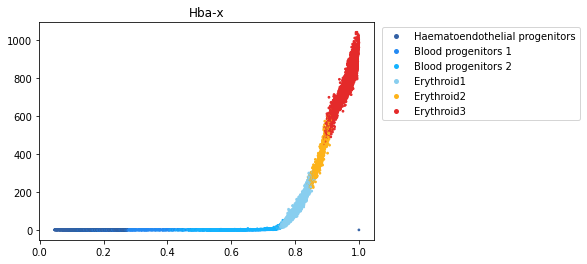

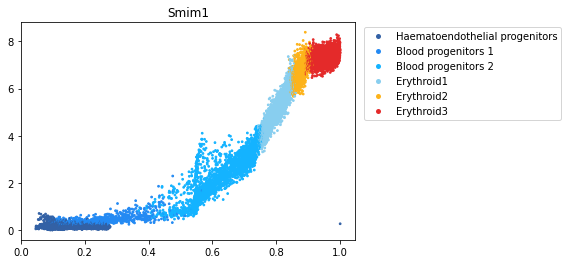

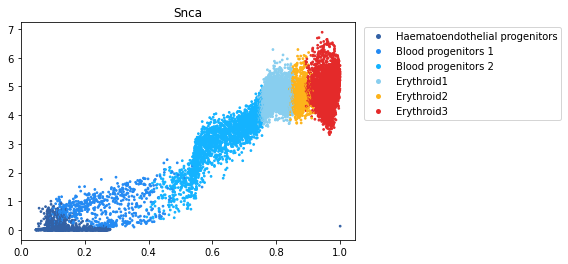

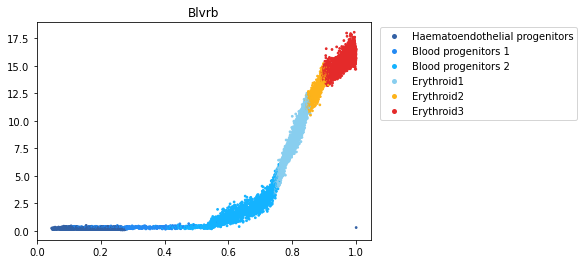

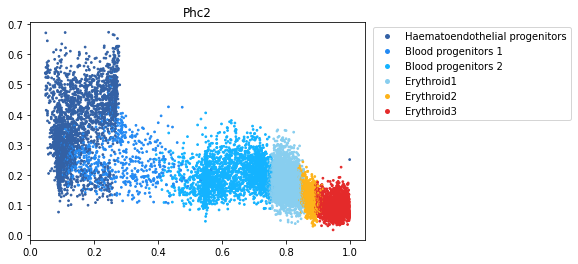

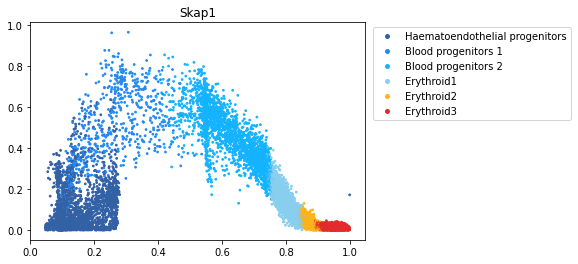

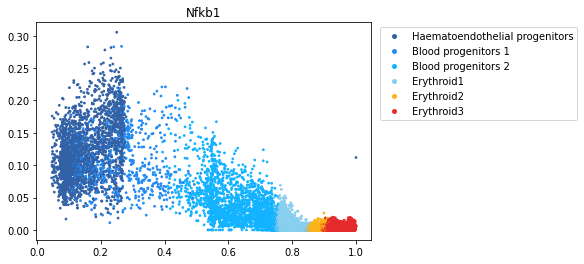

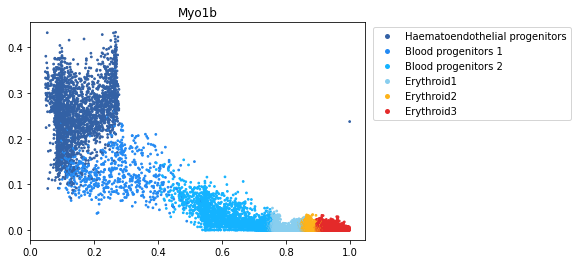

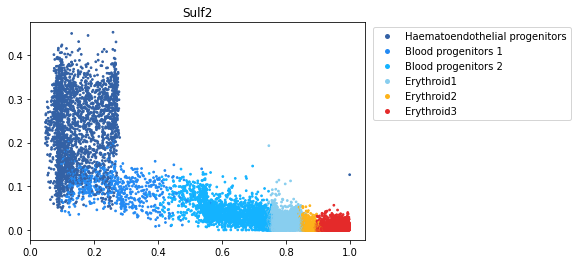

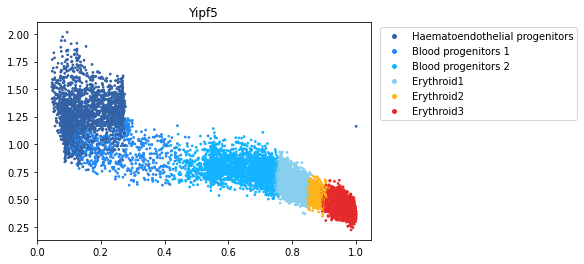

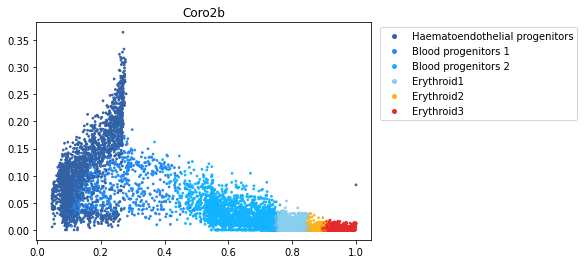

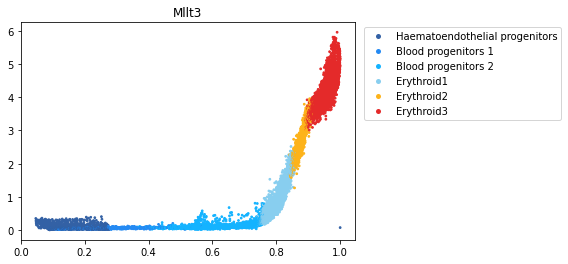

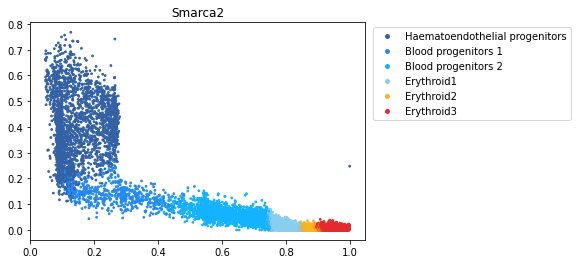

In [223]:
# radis 1

from colormap import *
color_list=solarExtra02.copy()

colors = {
'Haematoendothelial progenitors':color_list[0],
'Blood progenitors 1':color_list[1],
'Blood progenitors 2':color_list[2],
'Erythroid1':color_list[3],
'Erythroid2':color_list[4],
'Erythroid3':color_list[5]}


#colors=None


gene_list=['Hba-x','Smim1','Snca','Blvrb','Phc2','Skap1','Nfkb1','Myo1b','Sulf2','Yipf5','Coro2b','Mllt3','Smarca2']
#gene_list=['Hba-x']

save_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/'
#save_path=None

cell_time=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/pseudo_time_Gastrulation_combined_NN_radius1_smooth.csv')
cell_time_time_sort=cell_time.sort_values('pseudotime')
cell_time_time_sort.columns=['index','time']

gene_list_pseudotime(gene_list,load_cellDancer,colors,save_path=save_path)


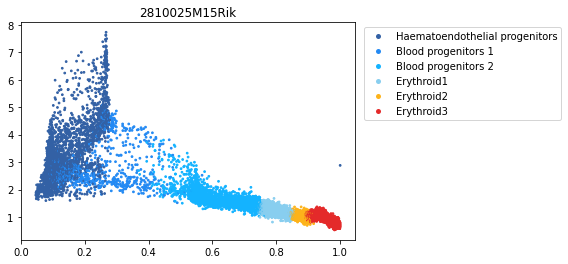

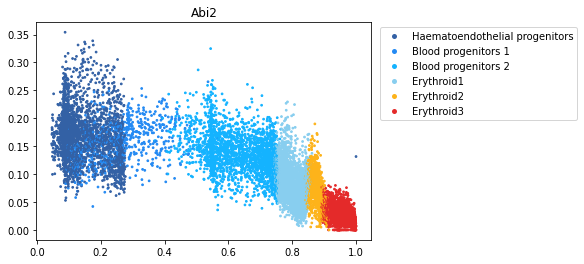

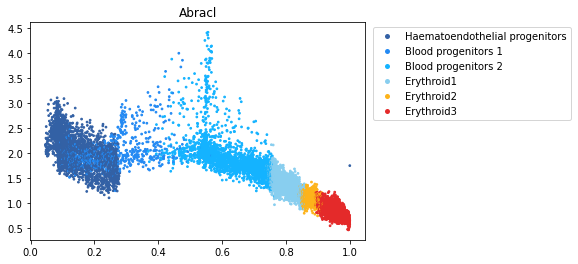

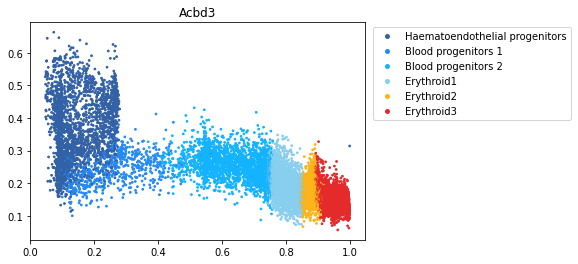

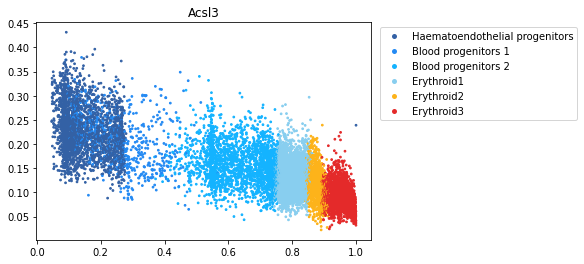

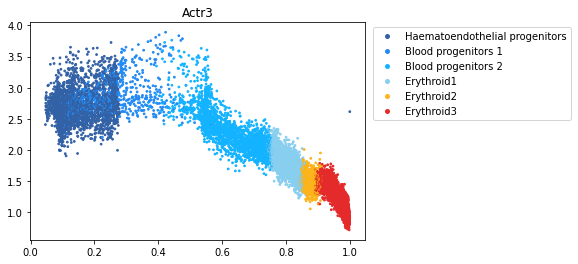

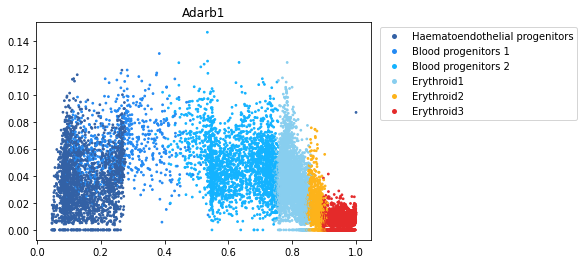

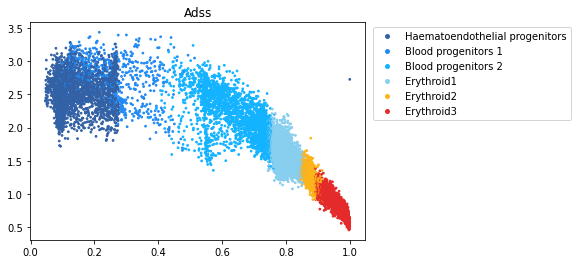

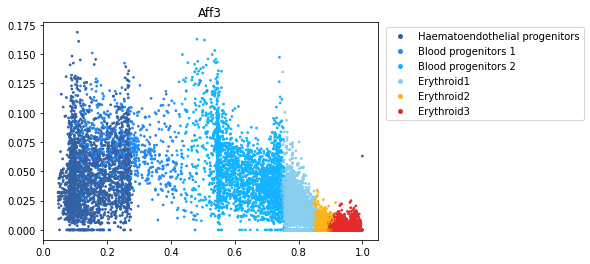

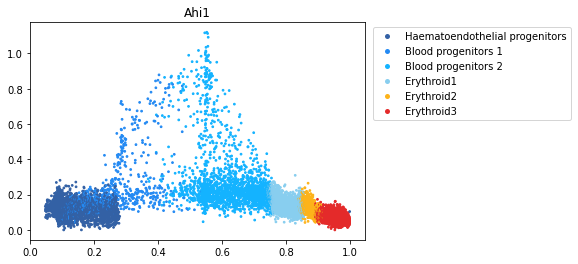

In [225]:
gene_list=load_cellDancer.gene_name.drop_duplicates()[0:10]
gene_list_pseudotime(gene_list,load_cellDancer,colors,save_path=save_path)

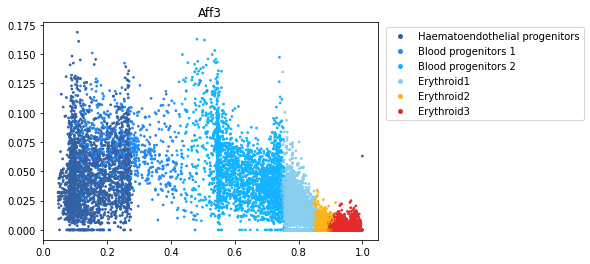

In [224]:
gene_list_pseudotime(['Aff3'],load_cellDancer,colors,save_path=save_path)

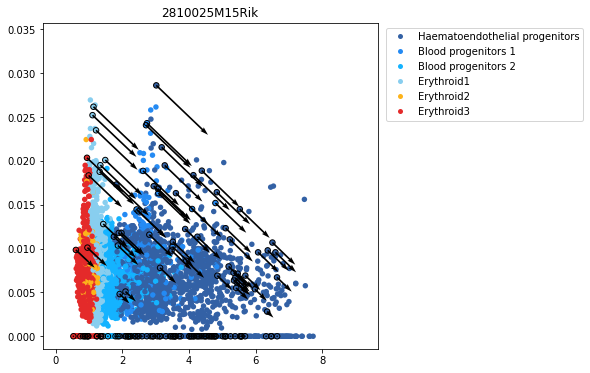

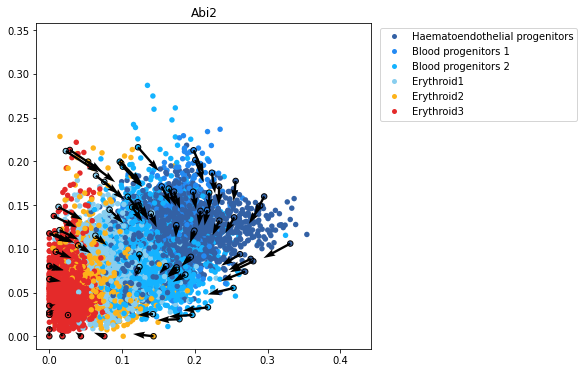

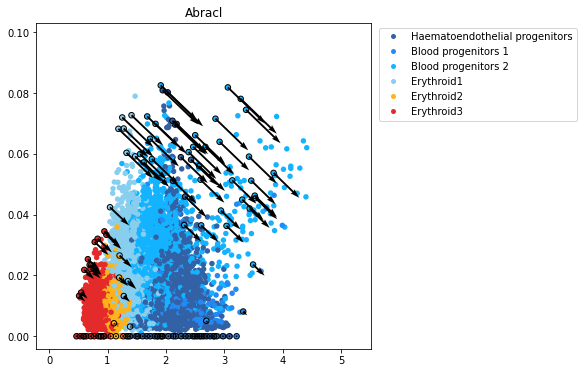

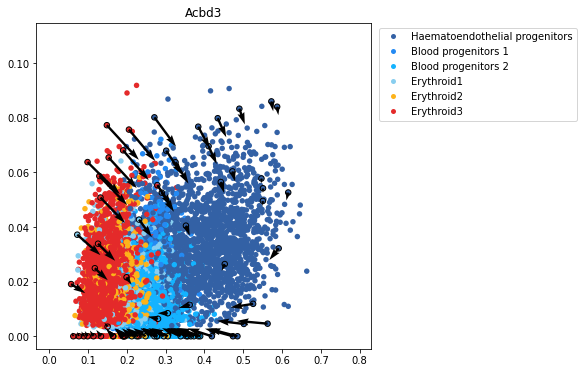

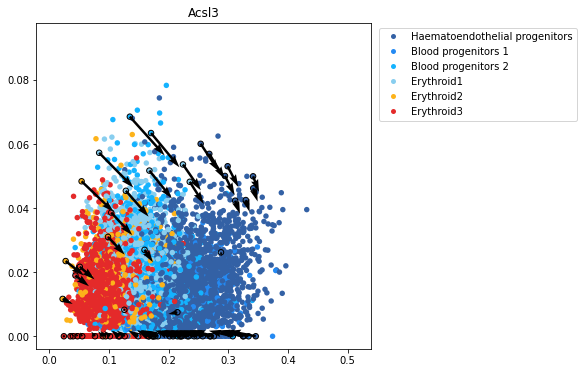

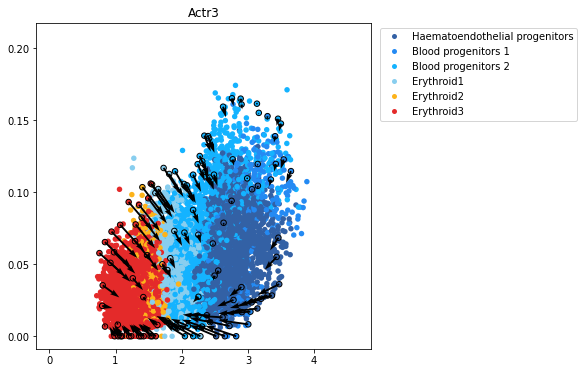

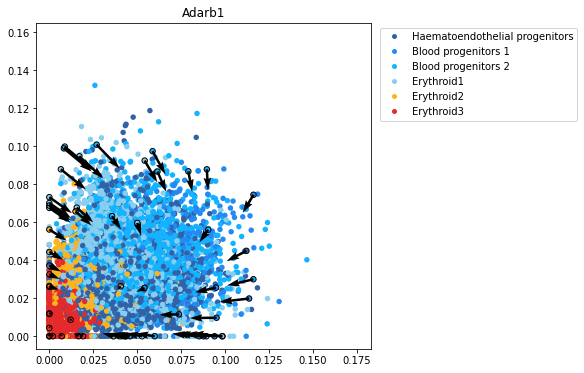

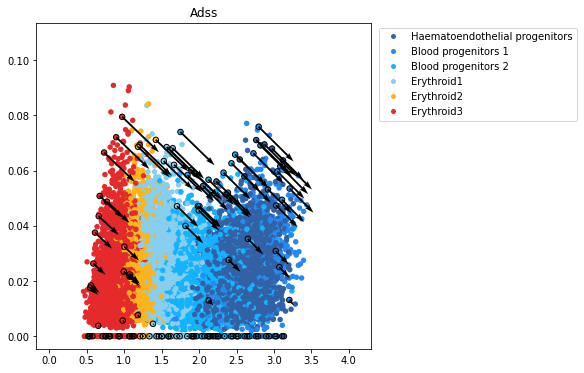

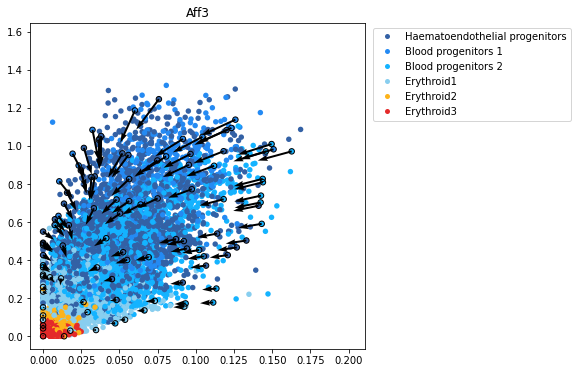

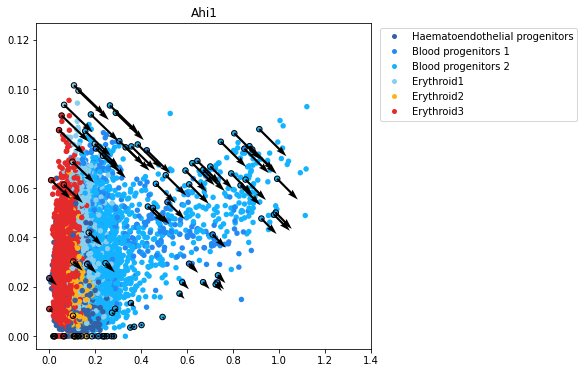

In [218]:
for gene in gene_list:
    vpl.velocity_gene(gene,load_cellDancer,colors=colors,mode='cluster',cluster_annot=True,cluster_info=onegene.clusters,point_size=30,alpha_inside=1)

In [220]:
min(load_cellDancer[load_cellDancer.gene_name=='Aff3'].s0)

0.0

In [159]:
# radis 1, heatmap
onegene=load_cellDancer[load_cellDancer.gene_name==load_cellDancer.gene_name[0]]
merged=pd.merge(cell_time_time_sort,onegene,left_on='index', right_on='cellIndex') # TODO: NOT cellIndex in the future

colors = {
'Haematoendothelial progenitors':color_list[0],
'Blood progenitors 1':color_list[1],
'Blood progenitors 2':color_list[2],
'Erythroid1':color_list[3],
'Erythroid2':color_list[4],
'Erythroid3':color_list[5]}

ids = {
'Haematoendothelial progenitors':0,
'Blood progenitors 1':1,
'Blood progenitors 2':2,
'Erythroid1':3,
'Erythroid2':4,
'Erythroid3':5}

import seaborn as sns


#plt.scatter(merged.time,[1]*len(merged.time),c=merged.clusters.map(colors),alpha=0.01)
cluster_time_sort=pd.DataFrame(merged.clusters.map(ids))

cluster_time_sort.index=merged['index']
cluster_time_sort.T.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/cluster_time_sort.csv')

In [154]:
color_list

['#3361A5', '#248AF3', '#14B3FF', '#88CEEF', '#FDB31A', '#E42A2A']

In [160]:
cluster_time_sort.T

index     3592   3442   5365   1466   5435   5708   5271   8794   1942   \
clusters      0      0      0      0      0      0      0      0      0   

index     5257   ...  3930   11886  7982   11435  11122  3784   11473  11604  \
clusters      0  ...      5      5      5      5      5      5      5      5   

index     12093  6844   
clusters      5      0  

[1 rows x 12329 columns]

In [182]:
# traj CLUSTER 1 & 2
traj_cluster = pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/cluster_1_and_2/pseudo_time_Gastrulation_cluster1_cluster2.csv')
traj_cluster_0 = traj_cluster[traj_cluster.traj_cluster==0].index
traj_cluster_1 = traj_cluster[traj_cluster.traj_cluster==1].index

cluster_time_sort_cluster_0=cluster_time_sort[cluster_time_sort.index.isin(traj_cluster_0)].T
cluster_time_sort_cluster_1=cluster_time_sort[cluster_time_sort.index.isin(traj_cluster_1)].T
cluster_time_sort_cluster_0.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/cluster_time_sort_cluster_0.csv')
cluster_time_sort_cluster_1.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/cluster_time_sort_cluster_1.csv')



In [185]:
#### heatmap
alpha_heatmap_raw=load_cellDancer.pivot(index='cellIndex', columns='gene_name', values='alpha')

In [195]:
alpha_heatmap_raw_cell_sort_by_time=alpha_heatmap_raw.T[cluster_time_sort_cluster_0.T.index]
alpha_heatmap_raw_cell_sort_by_time.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/cluster_time_sort_cluster_0_alpha_allgene.csv')

In [197]:
s0_heatmap_raw=load_cellDancer.pivot(index='cellIndex', columns='gene_name', values='s0')
s0_heatmap_raw_cell_sort_by_time=s0_heatmap_raw.T[cluster_time_sort_cluster_0.T.index]
s0_heatmap_raw_cell_sort_by_time.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/cluster_time_sort_cluster_0_s0_allgene.csv')

In [198]:
#
para_df.apply(lambda x: mannwhitneyu(x[idx_cell_choice], x[~idx_cell_choice],alternative="greater"))
s0_heatmap_raw_cell_sort_by_time

cellIndex         10576     2891      6134      9437      3606      6425   \
gene_name                                                                   
0610010F05Rik  0.096700  0.128834  0.111648  0.131514  0.138191  0.131783   
1110038B12Rik  1.069637  1.020362  0.962238  1.035347  1.146088  1.177948   
1500009L16Rik  0.617392  0.653615  0.600975  0.698245  0.651468  0.727481   
1700017B05Rik  0.163889  0.160706  0.199105  0.182902  0.173908  0.158638   
1700027J19Rik  0.572426  0.615170  0.579657  0.531567  0.688092  0.469003   
...                 ...       ...       ...       ...       ...       ...   
Zrsr2          0.898091  0.855490  0.986772  0.836006  0.780993  0.865232   
Zscan21        0.628727  0.653286  0.635191  0.631017  0.608534  0.693389   
Zscan26        0.024924  0.030029  0.045135  0.024386  0.053803  0.033965   
Zswim6         0.187288  0.134605  0.237754  0.160095  0.160521  0.159476   
Zswim7         0.322961  0.292389  0.304006  0.325880  0.423799  0.253494   

cellIndex         5520      1986      6882      7233   ...     3930   \
gene_name                                              ...             
0610010F05Rik  0.118341  0.200729  0.125399  0.134992  ...  0.044262   
1110038B12Rik  0.971857  1.134744  1.226324  1.140521  ...  0.403637   
1500009L16Rik  0.686826  0.603021  0.709392  0.747171  ...  0.034380   
1700017B05Rik  0.172843  0.207407  0.294705  0.193415  ...  0.062164   
1700027J19Rik  0.454368  0.749403  0.699358  0.568552  ...  0.000000   
...                 ...       ...       ...       ...  ...       ...   
Zrsr2          0.775137  1.019292  1.068207  0.875463  ...  0.193013   
Zscan21        0.629800  0.623212  0.375719  0.599991  ...  0.123622   
Zscan26        0.029200  0.015339  0.022302  0.020566  ...  0.000000   
Zswim6         0.130081  0.155262  0.085939  0.185320  ...  0.000000   
Zswim7         0.329072  0.364524  0.501406  0.286588  ...  0.246866   

cellIndex         11886     7982      11435     11122     3784      11473  \
gene_name                                                                   
0610010F05Rik  0.029431  0.050349  0.054333  0.055289  0.051791  0.047917   
1110038B12Rik  0.461725  0.457142  0.434558  0.447485  0.427837  0.439269   
1500009L16Rik  0.026434  0.030603  0.059106  0.041182  0.015751  0.046427   
1700017B05Rik  0.027988  0.056373  0.053646  0.039584  0.049254  0.065170   
1700027J19Rik  0.000000  0.000000  0.031534  0.029881  0.018468  0.000000   
...                 ...       ...       ...       ...       ...       ...   
Zrsr2          0.176189  0.191772  0.230593  0.209804  0.193006  0.227903   
Zscan21        0.131430  0.129134  0.103691  0.113425  0.122173  0.149353   
Zscan26        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Zswim6         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Zswim7         0.197860  0.228986  0.267824  0.212243  0.237899  0.245249   

cellIndex         11604     12093     6844   
gene_name                                    
0610010F05Rik  0.046612  0.058128  0.150968  
1110038B12Rik  0.396254  0.386269  1.073956  
1500009L16Rik  0.034097  0.036737  0.761277  
1700017B05Rik  0.081382  0.058216  0.216169  
1700027J19Rik  0.004997  0.014156  0.668763  
...                 ...       ...       ...  
Zrsr2          0.200933  0.193190  0.906041  
Zscan21        0.116318  0.132394  0.324084  
Zscan26        0.000000  0.000000  0.057876  
Zswim6         0.000000  0.000000  0.074537  
Zswim7         0.232347  0.224996  0.590614  

[2000 rows x 10321 columns]

In [209]:
heatmap_bar_cluster_0_cluster1=pd.DataFrame(pd.merge(merged,traj_cluster,left_on='index', right_on='index')['traj_cluster']).T
heatmap_bar_cluster_0_cluster1.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/heatmap_bar_cluster_0_cluster1.csv')

In [208]:
pd.DataFrame(pd.merge(merged,traj_cluster,left_on='index', right_on='index')['traj_cluster']).T

0      1      2      3      4      5      6      7      8      \
traj_cluster      1      1      1      1      1      1      1      1      1   

              9      ...  12319  12320  12321  12322  12323  12324  12325  \
traj_cluster      1  ...      0      0      0      0      0      0      0   

              12326  12327  12328  
traj_cluster      0      0      0  

[1 rows x 12329 columns]

In [231]:
# Non-para
# https://pythonhosted.org/PyQt-Fit/NonParam_tut.html
# https://towardsdatascience.com/time-series-clustering-deriving-trends-and-archetypes-from-sequential-data-bb87783312b4

In [233]:
import pyqt_fit.nonparam_regression as smooth
from pyqt_fit import npr_methods

ModuleNotFoundError: No module named 'pyqt_fit'